In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime



In [2]:
# Extract historical stock data from Yahoo Finance for each ticker
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

NameError: name 'tickers' is not defined

In [5]:
# Display the first few rows of the extracted data for each ticker
for ticker in tickers:
    print(f"\nData for {ticker}:")
    print(stock_data[ticker].head())


Data for AAPL:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725037  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513926  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053942  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959503  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200

Data for MSFT:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  27.250000  27.730000  27.150000  27.620001  22.492277  52899300
2013-01-03  27.629999  27.650000  27.160000  27.250000  22.190969  48294400
2013-01-04  27.270000  27.340000  26.730000  26.740000  21.775650  52521100
2013-01-07  26.770000  26.879999  26.639999  26.6

In [6]:
## Data Cleaning

In [7]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)

In [8]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)


In [9]:
# Display the combined data structure
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725037  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513926  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053942  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959503  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [10]:
# Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AAPL  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MSFT  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JNJ   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JPM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PG    Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
XOM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
NVDA  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PFE   Open         0
      High         0
      Low          0
      Close        0
  

In [11]:
# Display the first few rows of the cleaned data
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725037  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513926  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053942  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959503  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [12]:
!pip install prophet

In [20]:
from prophet import Prophet

In [21]:
combined_data_prophet = combined_data.copy()

In [23]:
combined_data_prophet.head()


Date       AAPL                                              \
                   Open       High        Low      Close  Adj Close   
0 2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725037   
1 2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513926   
2 2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053942   
3 2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959503   
4 2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459   

                   MSFT                        ...         KO             \
      Volume       Open       High        Low  ...        Low      Close   
0  560518000  27.250000  27.730000  27.150000  ...  36.660000  37.599998   
1  352965200  27.629999  27.650000  27.160000  ...  37.110001  37.599998   
2  594333600  27.270000  27.340000  26.730000  ...  37.520000  37.660000   
3  484156400  26.770000  26.879999  26.639999  ...  37.099998  37.299999   
4  458707200  26.750000  26.790001  26.459999  ...  36.910000  37.040001   

                            TSLA                                          \
   Adj Close    Volume      Open      High       Low     Close Adj Close   
0  26.194853  21872400  2.333333  2.363333  2.314000  2.357333  2.357333   
1  26.194853  16357900  2.345333  2.363333  2.316667  2.318000  2.318000   
2  26.236650  15311300  2.320000  2.320000  2.261333  2.293333  2.293333   
3  25.985846  14610200  2.320000  2.320000  2.260000  2.289333  2.289333   
4  25.804720  14324300  2.300000  2.300000  2.207333  2.245333  2.245333   

             
     Volume  
0  17922000  
1  11130000  
2  10110000  
3   6630000  
4  19260000  

[5 rows x 61 columns]

In [29]:
combined_data_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (ds, )             2893 non-null   datetime64[ns]
 1   (AAPL, Open)       2893 non-null   float64       
 2   (AAPL, High)       2893 non-null   float64       
 3   (AAPL, Low)        2893 non-null   float64       
 4   (AAPL, y)          2893 non-null   float64       
 5   (AAPL, Adj Close)  2893 non-null   float64       
 6   (AAPL, Volume)     2893 non-null   int64         
 7   (MSFT, Open)       2893 non-null   float64       
 8   (MSFT, High)       2893 non-null   float64       
 9   (MSFT, Low)        2893 non-null   float64       
 10  (MSFT, y)          2893 non-null   float64       
 11  (MSFT, Adj Close)  2893 non-null   float64       
 12  (MSFT, Volume)     2893 non-null   int64         
 13  (JNJ, Open)        2893 non-null   float64       
 14  (JNJ, Hi

In [ ]:
#notes:
#m = Prophet(multiple_y=True)
#m.add_country_names(df, country_names=['y1', 'y2'])

In [24]:
# Rename columns to 'ds' and 'y'
combined_data_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [25]:
#prophet_data = combined_data_prophet.columns =["ds", "y"]

In [26]:
display(combined_data_prophet.head())
display(combined_data_prophet.tail())

ds       AAPL                                              \
                   Open       High        Low          y  Adj Close   
0 2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725037   
1 2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513926   
2 2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053942   
3 2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959503   
4 2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459   

                   MSFT                        ...         KO             \
      Volume       Open       High        Low  ...        Low          y   
0  560518000  27.250000  27.730000  27.150000  ...  36.660000  37.599998   
1  352965200  27.629999  27.650000  27.160000  ...  37.110001  37.599998   
2  594333600  27.270000  27.340000  26.730000  ...  37.520000  37.660000   
3  484156400  26.770000  26.879999  26.639999  ...  37.099998  37.299999   
4  458707200  26.750000  26.790001  26.459999  ...  36.910000  37.040001   

                            TSLA                                          \
   Adj Close    Volume      Open      High       Low         y Adj Close   
0  26.194853  21872400  2.333333  2.363333  2.314000  2.357333  2.357333   
1  26.194853  16357900  2.345333  2.363333  2.316667  2.318000  2.318000   
2  26.236650  15311300  2.320000  2.320000  2.261333  2.293333  2.293333   
3  25.985846  14610200  2.320000  2.320000  2.260000  2.289333  2.289333   
4  25.804720  14324300  2.300000  2.300000  2.207333  2.245333  2.245333   

             
     Volume  
0  17922000  
1  11130000  
2  10110000  
3   6630000  
4  19260000  

[5 rows x 61 columns]

ds        AAPL                                                  \
                       Open        High         Low           y   Adj Close   
2888 2024-06-25  209.149994  211.380005  208.610001  209.070007  209.070007   
2889 2024-06-26  211.500000  214.860001  210.639999  213.250000  213.250000   
2890 2024-06-27  214.690002  215.740005  212.350006  214.100006  214.100006   
2891 2024-06-28  215.770004  216.070007  210.300003  210.619995  210.619995   
2892 2024-07-01  212.089996  217.509995  211.919998  216.750000  216.750000   

                      MSFT                          ...         KO             \
        Volume        Open        High         Low  ...        Low          y   
2888  56713900  448.250000  451.420013  446.750000  ...  63.509998  63.840000   
2889  66213200  449.000000  453.600006  448.190002  ...  63.230000  64.050003   
2890  49772700  452.179993  456.170013  451.769989  ...  63.619999  63.910000   
2891  82542700  453.070007  455.380005  446.410004  ...  63.520000  63.650002   
2892  60402900  448.660004  457.369995  445.660004  ...  63.119999  63.279999   

                                 TSLA                                      \
      Adj Close    Volume        Open        High         Low           y   
2888  63.840000  10546800  184.399994  187.970001  182.009995  187.350006   
2889  64.050003   9402500  186.539993  197.759995  186.360001  196.369995   
2890  63.910000   8494100  195.169998  198.720001  194.050003  197.419998   
2891  63.650002  17358800  199.550003  203.199997  195.259995  197.880005   
2892  63.279999  10033400  201.020004  213.229996  200.850006  209.860001   

                             
       Adj Close     Volume  
2888  187.350006   63678300  
2889  196.369995   95737100  
2890  197.419998   72746500  
2891  197.880005   95438100  
2892  209.860001  135691400  

[5 rows x 61 columns]

In [40]:
combined_data.columns = [f"{ticker}_{attr}" for ticker, attr in combined_data.columns]

In [44]:
combined_data.reset_index(inplace=True)

In [45]:
combined_data.head()

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,...,KO_Low,KO_Close,KO_Adj Close,KO_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.725037,560518000,27.250000,27.730000,27.150000,...,36.660000,37.599998,26.194853,21872400,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513926,352965200,27.629999,27.650000,27.160000,...,37.110001,37.599998,26.194853,16357900,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053942,594333600,27.270000,27.340000,26.730000,...,37.520000,37.660000,26.236650,15311300,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959503,484156400,26.770000,26.879999,26.639999,...,37.099998,37.299999,25.985846,14610200,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002459,458707200,26.750000,26.790001,26.459999,...,36.910000,37.040001,25.804720,14324300,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [66]:
# Function to train and evaluate models for a given stock
def train_and_evaluate(ticker, combined_data):
    # Extract target variable (Close price of the given ticker) and features (all other columns)
    target_column = f'{ticker}_Close'
    y = combined_data[target_column].values
    ds = combined_data["Date"]
    
    prophet_df = pd.DataFrame({'ds': ds, 'y': y})
    
    model = Prophet() 
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days)
    forecast = model.predict(future)
   
    model.plot(forecast)
   # Display the underlying forecast dataframe (tail)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
   # Reset the index to this datetime column so that our plot looks nice
    forecast = forecast.set_index('ds')

    # Display the DataFrame
    forecast.head()

    # Plot predictions for our forecast period
    forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot()

    # Reset "ds" from the datetime index back to a column
    forecast = forecast.reset_index()
    forecast.head()

        # Reset "ds" from the datetime index back to a column
    forecast = forecast.reset_index()
    forecast.head()

    # Plot the individual time series components of the model
    fig2 = model.plot_components(forecast)


Evaluating models for AAPL


20:26:12 - cmdstanpy - INFO - Chain [1] start processing
20:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for MSFT


20:26:13 - cmdstanpy - INFO - Chain [1] start processing
20:26:14 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for JNJ


20:26:15 - cmdstanpy - INFO - Chain [1] start processing
20:26:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for JPM


20:26:18 - cmdstanpy - INFO - Chain [1] start processing
20:26:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for PG


20:26:21 - cmdstanpy - INFO - Chain [1] start processing
20:26:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for XOM


20:26:24 - cmdstanpy - INFO - Chain [1] start processing
20:26:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for NVDA


20:26:26 - cmdstanpy - INFO - Chain [1] start processing
20:26:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:152: RuntimeWarning: More than 20 figures have been opened. Figures created through 


Evaluating models for PFE


20:26:29 - cmdstanpy - INFO - Chain [1] start processing
20:26:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for KO


20:26:31 - cmdstanpy - INFO - Chain [1] start processing
20:26:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 


Evaluating models for TSLA


20:26:34 - cmdstanpy - INFO - Chain [1] start processing
20:26:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

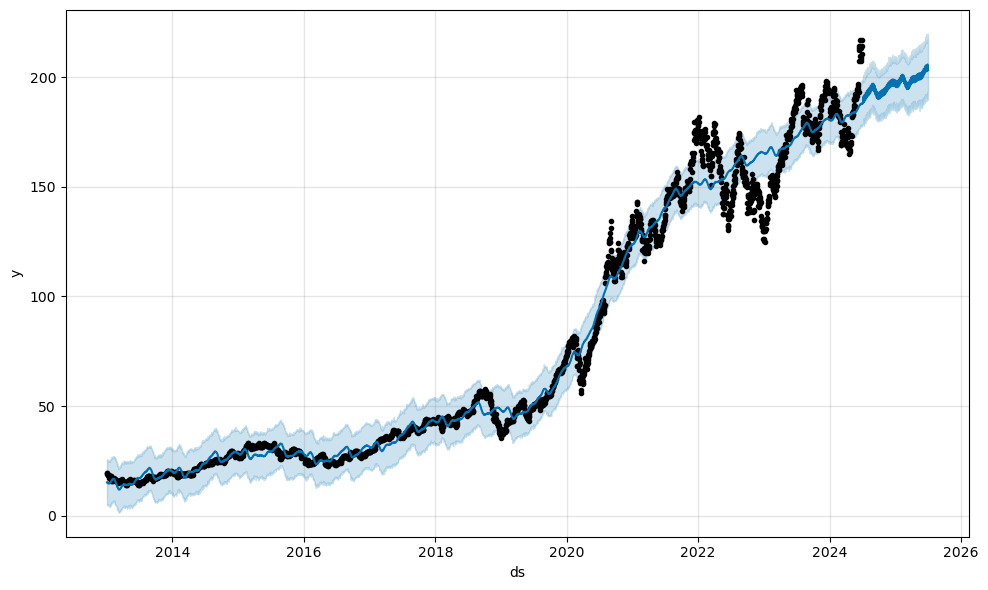

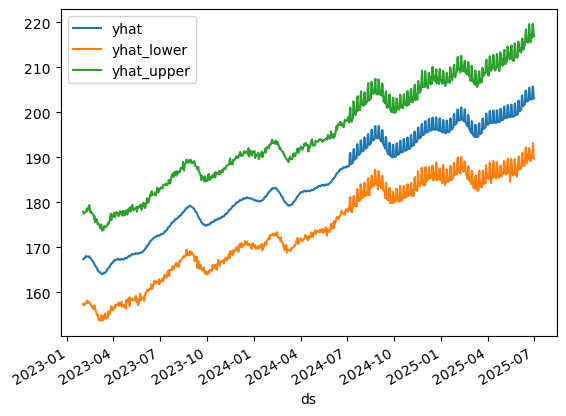

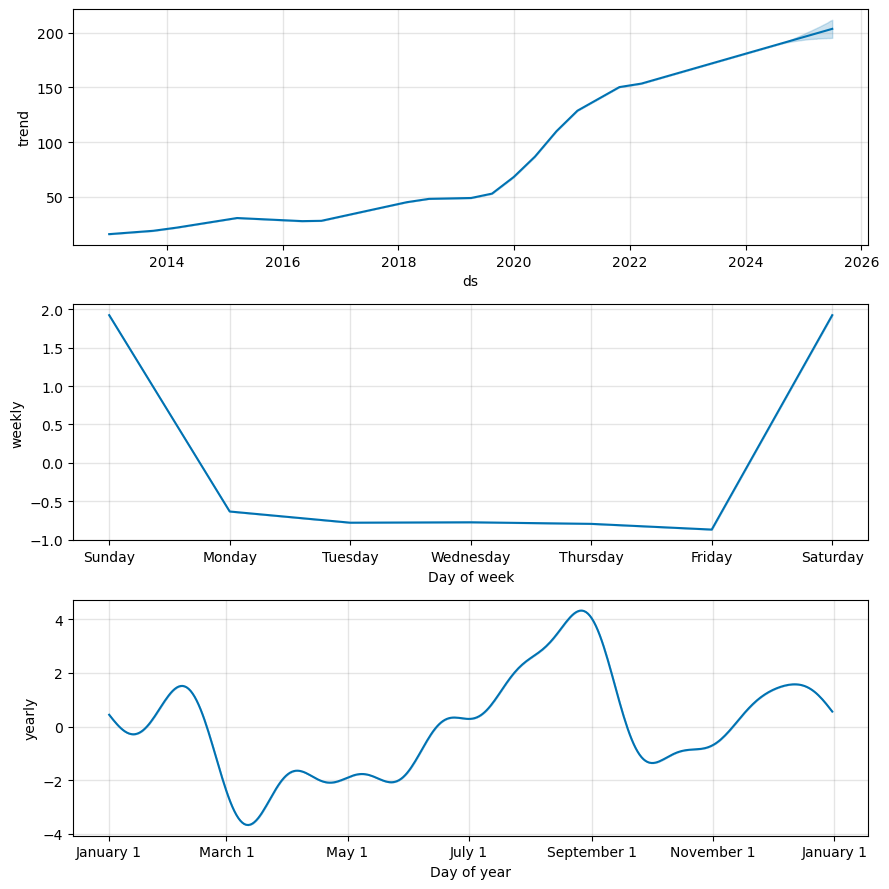

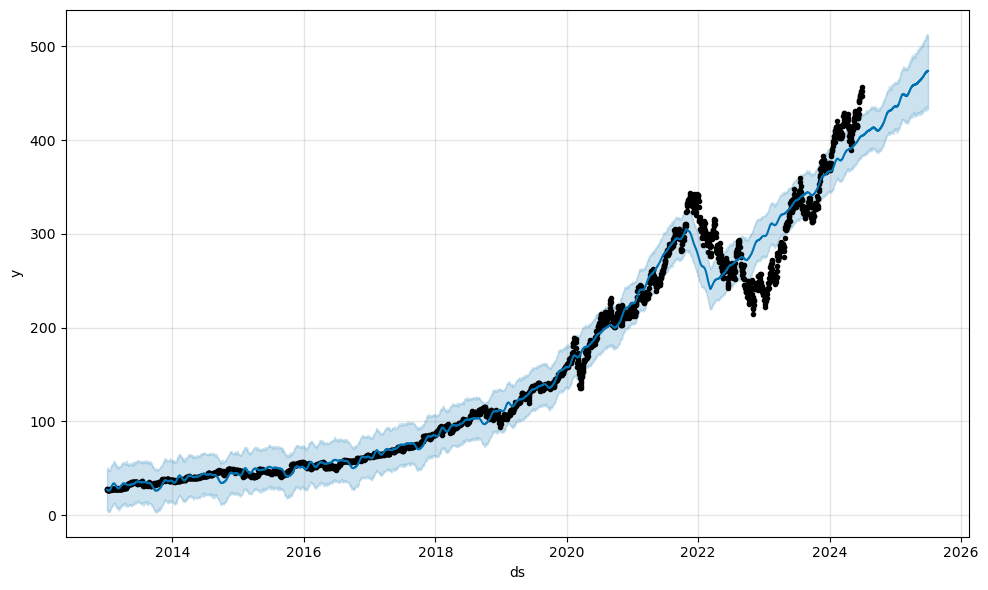

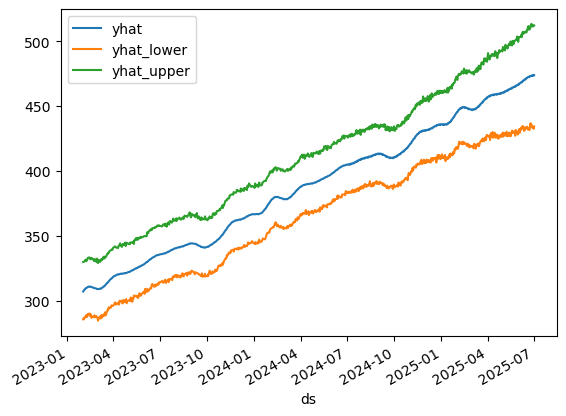

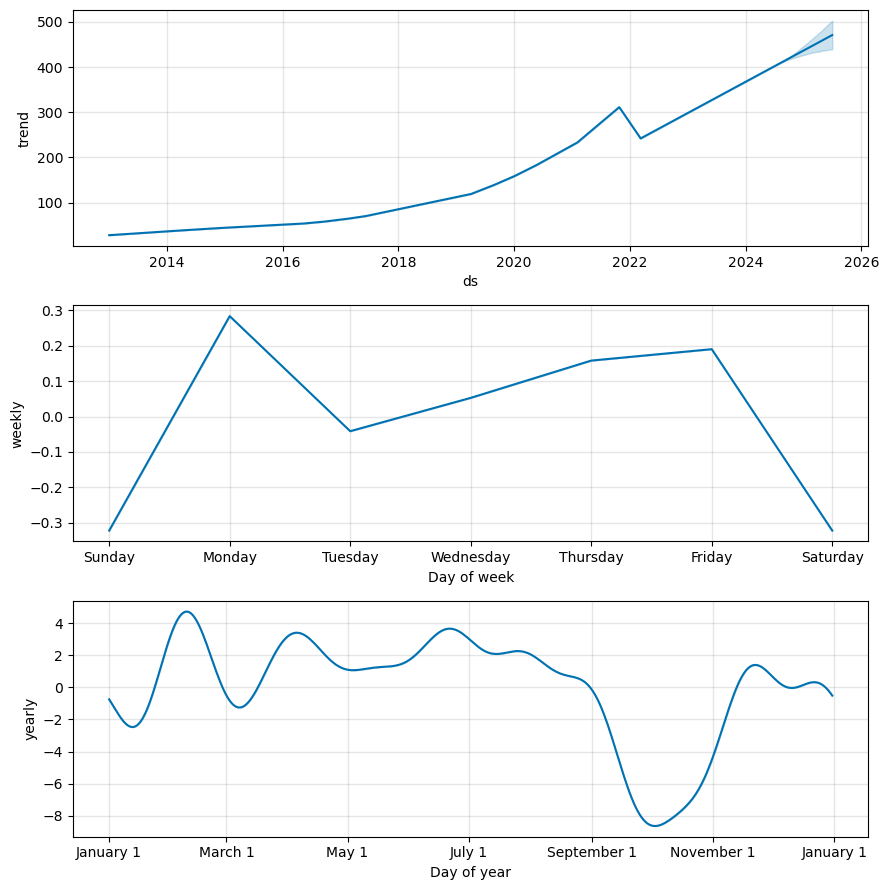

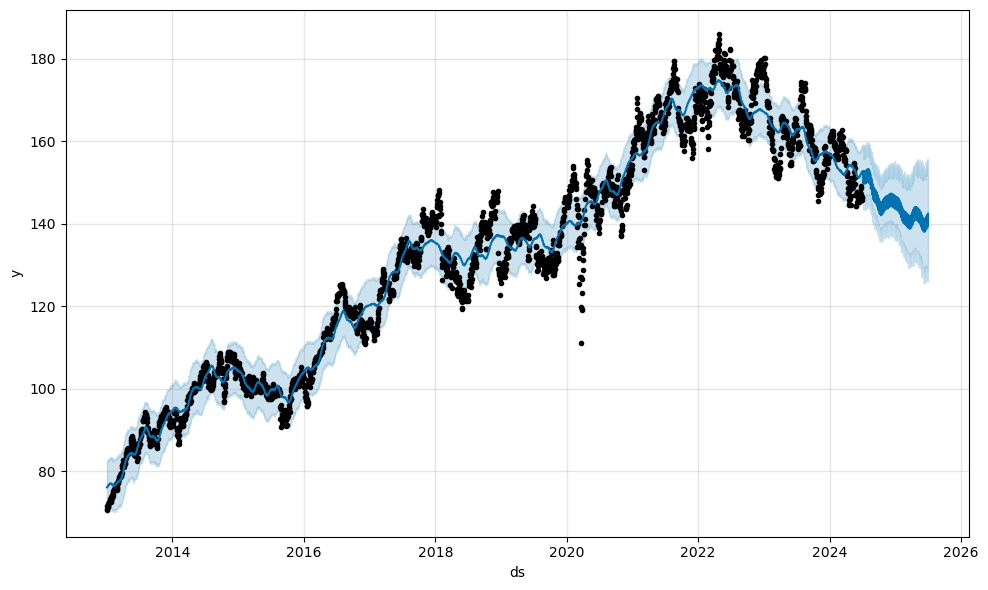

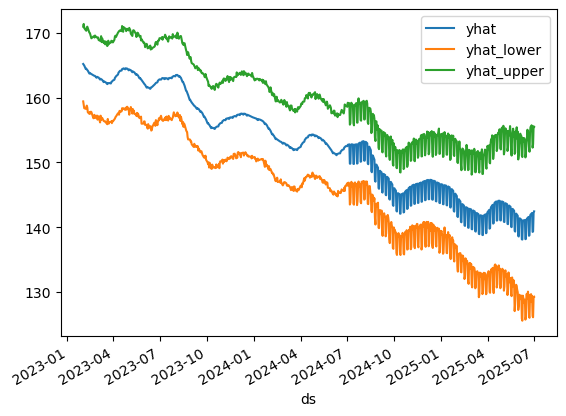

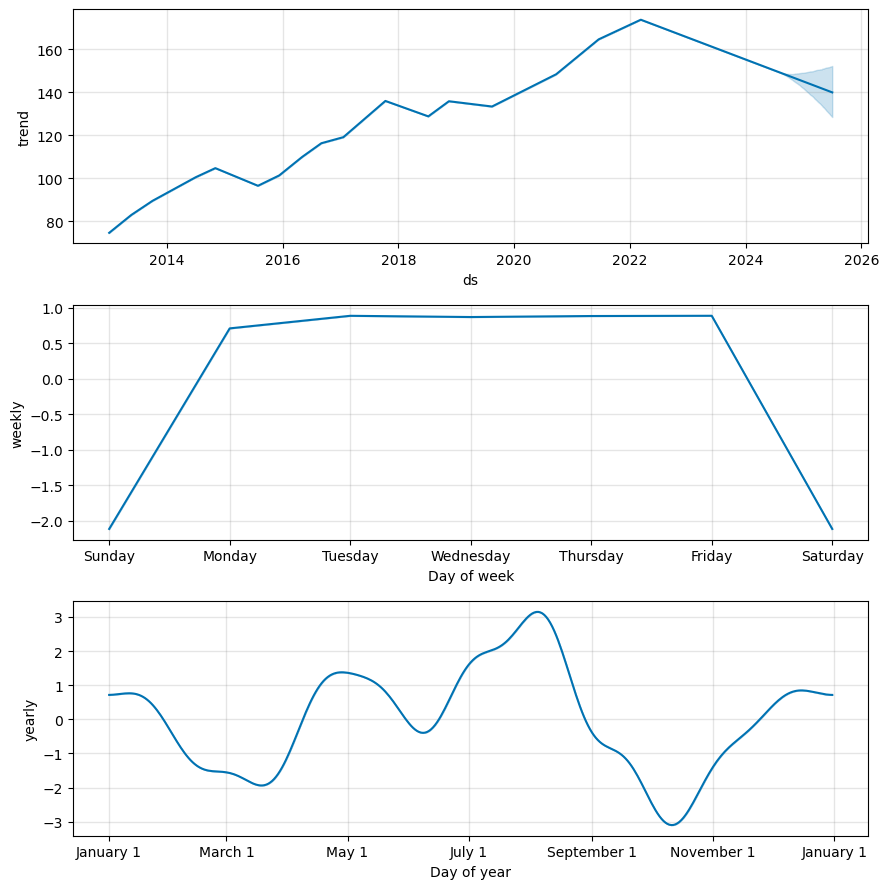

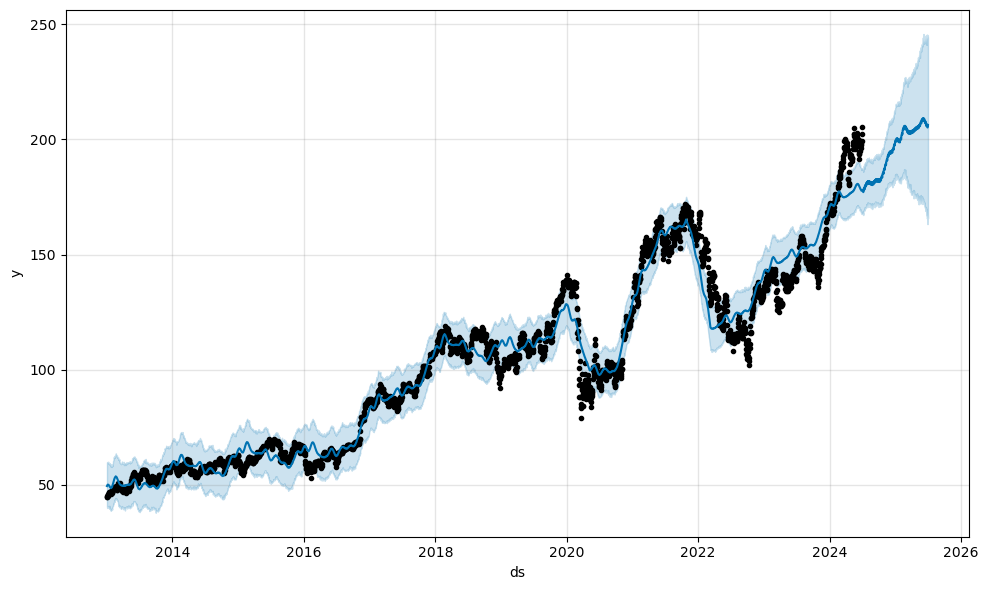

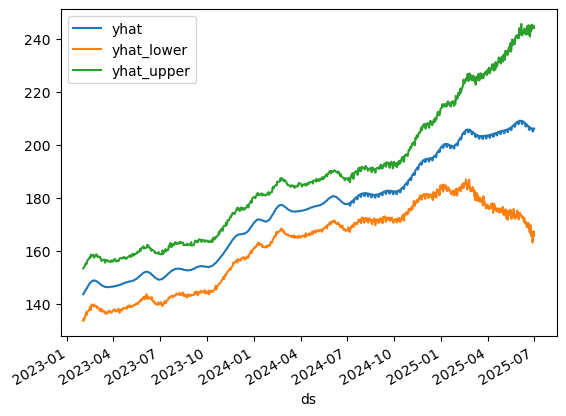

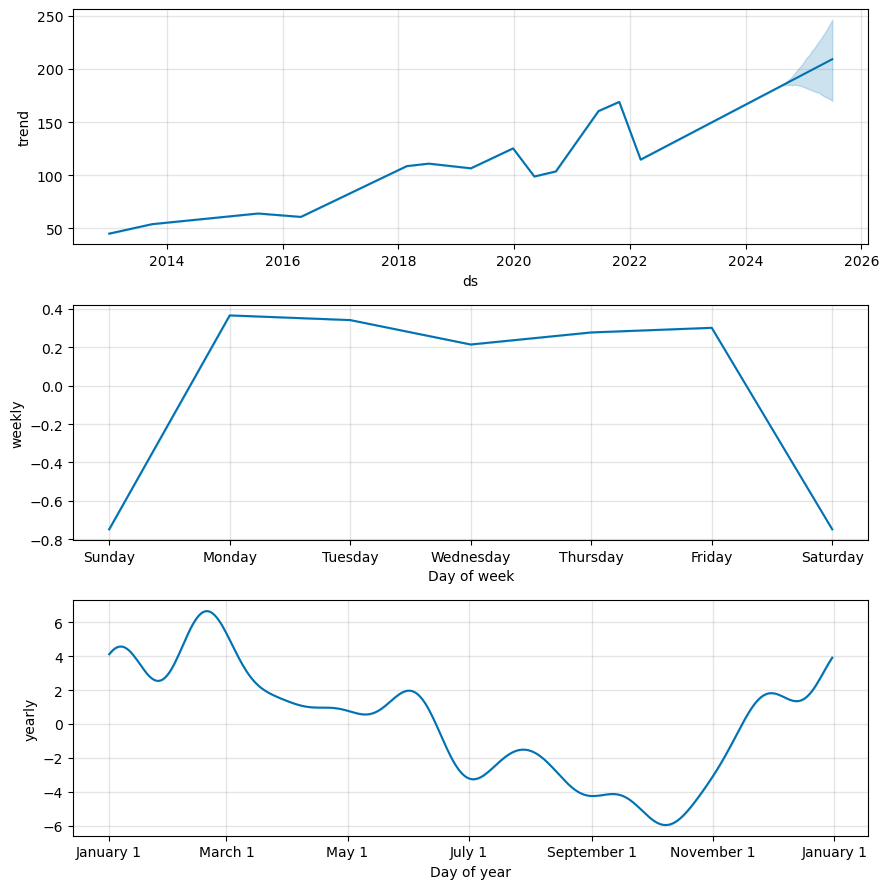

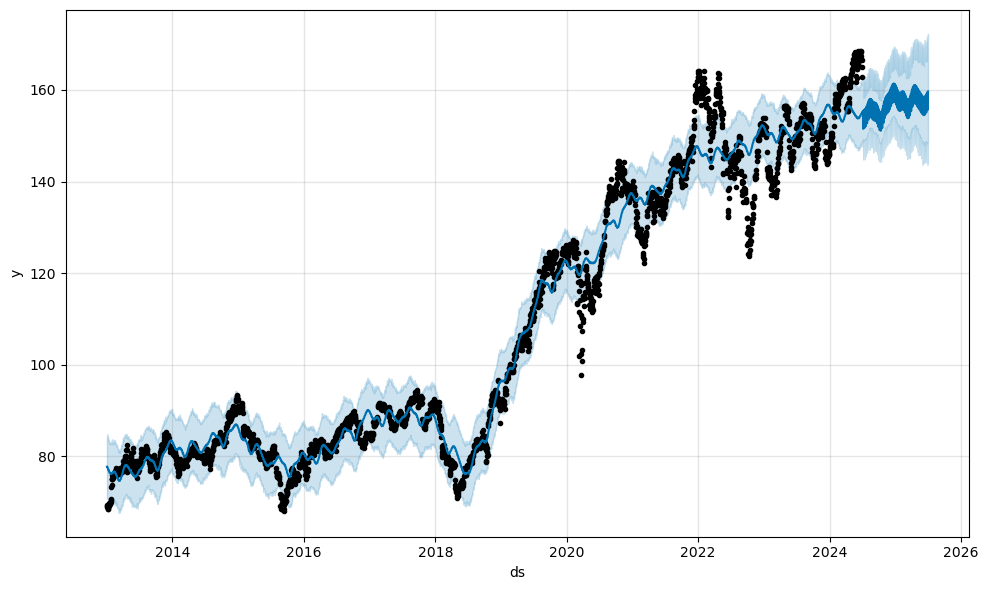

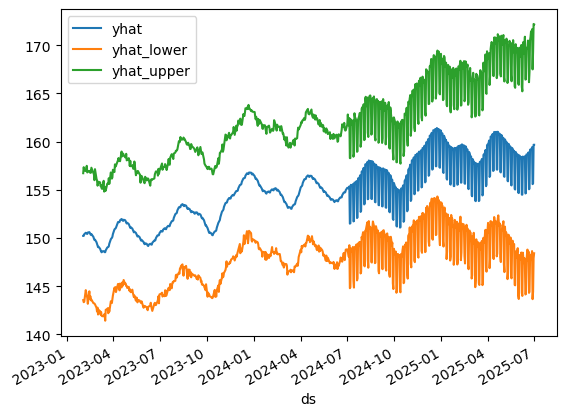

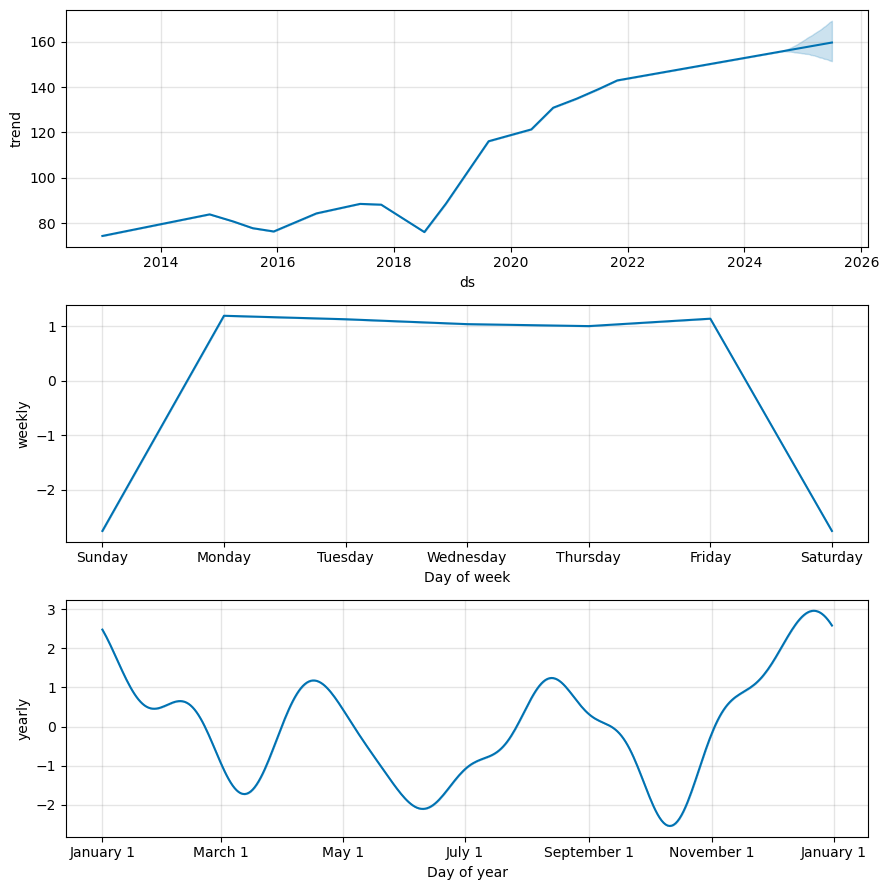

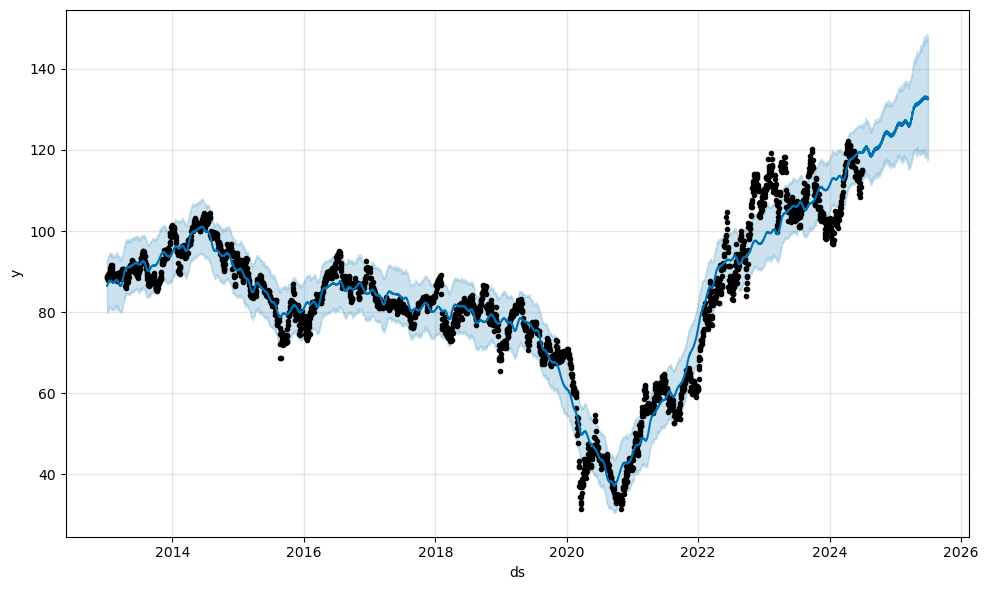

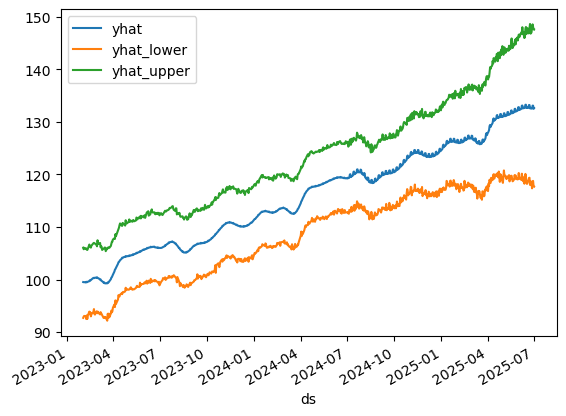

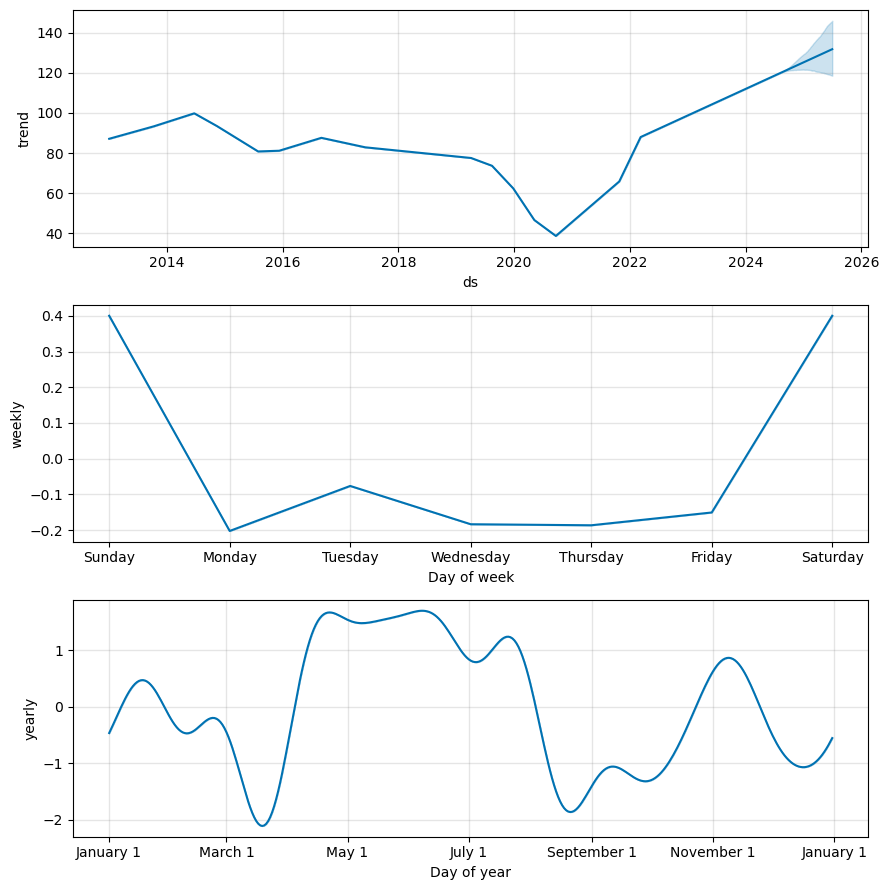

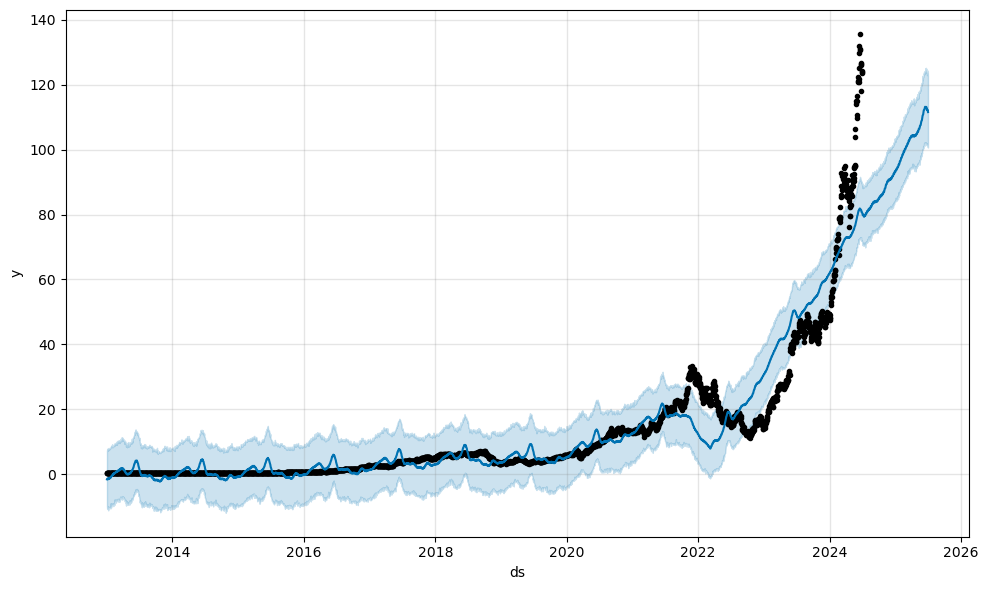

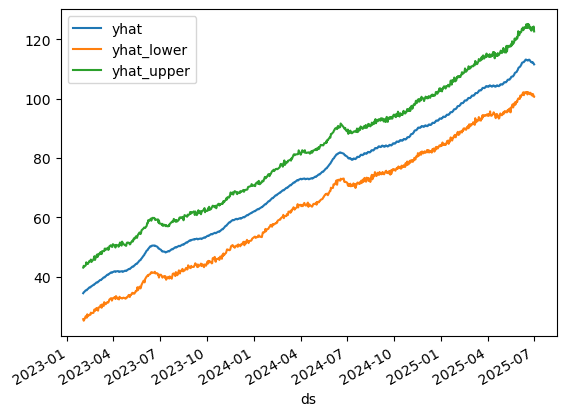

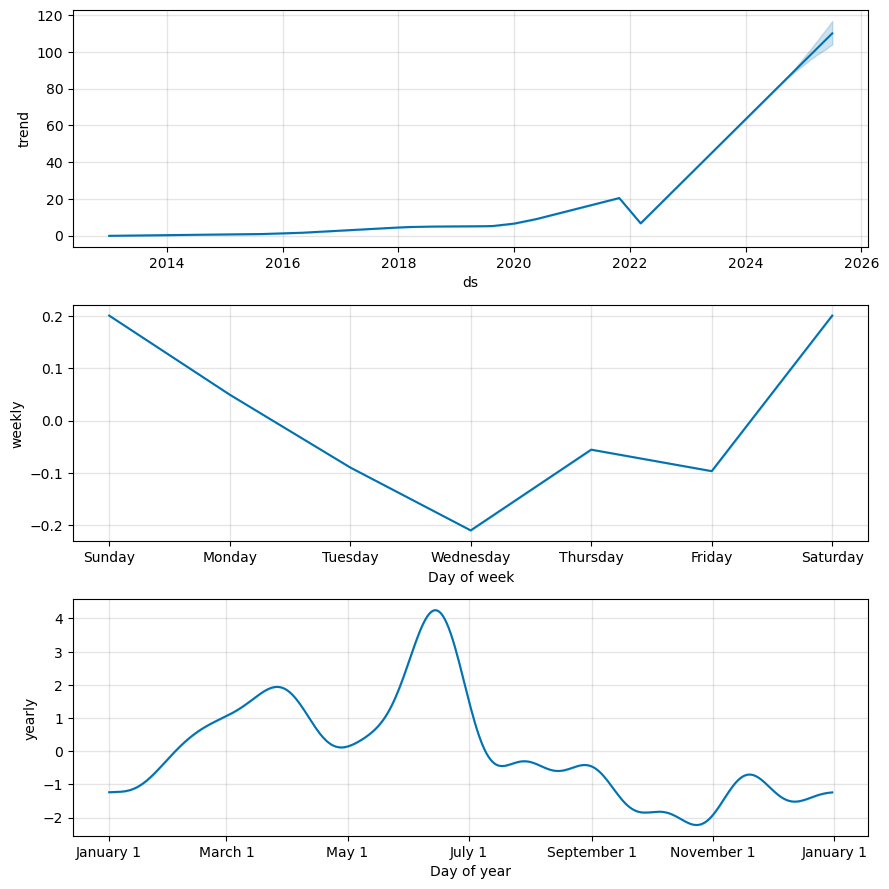

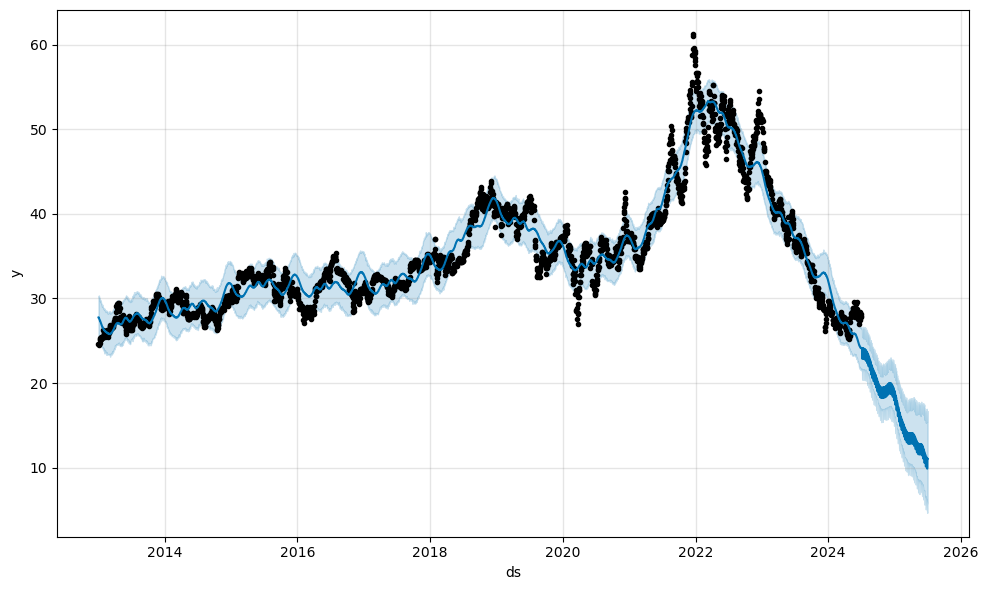

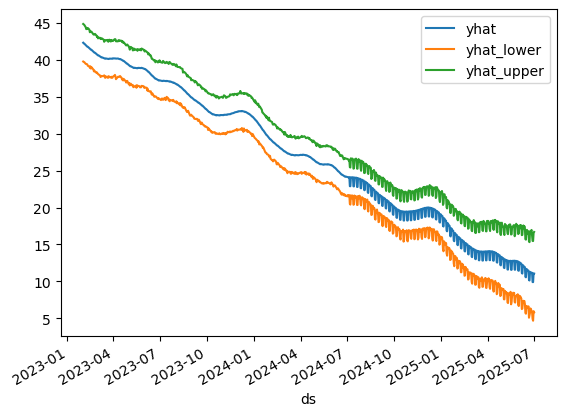

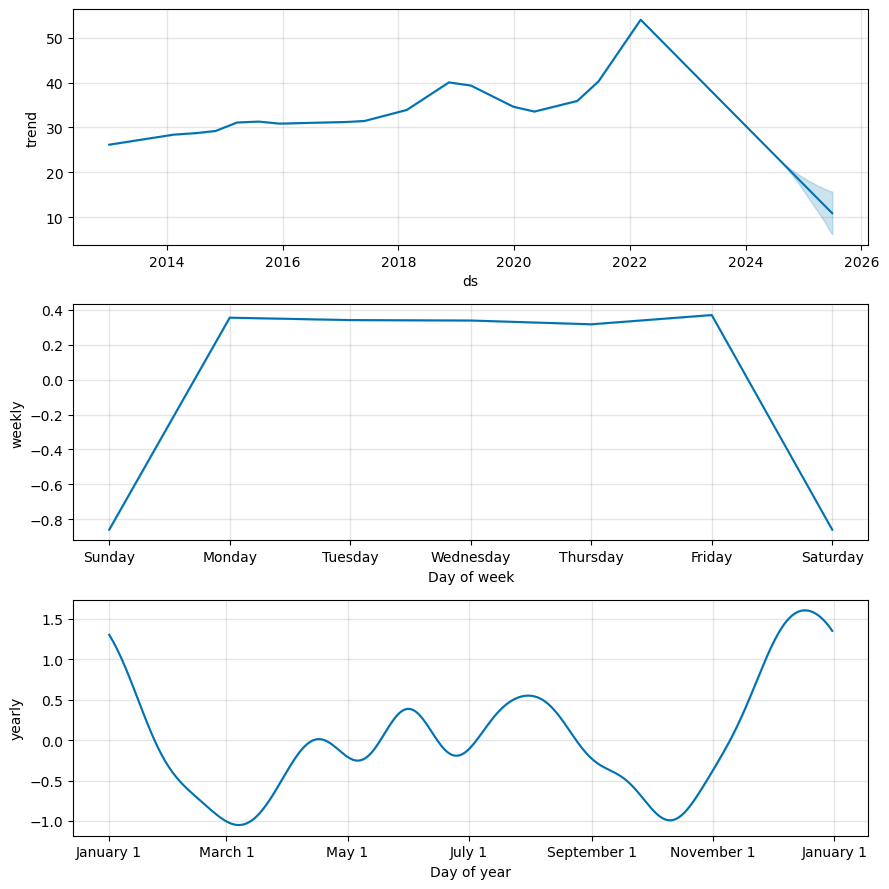

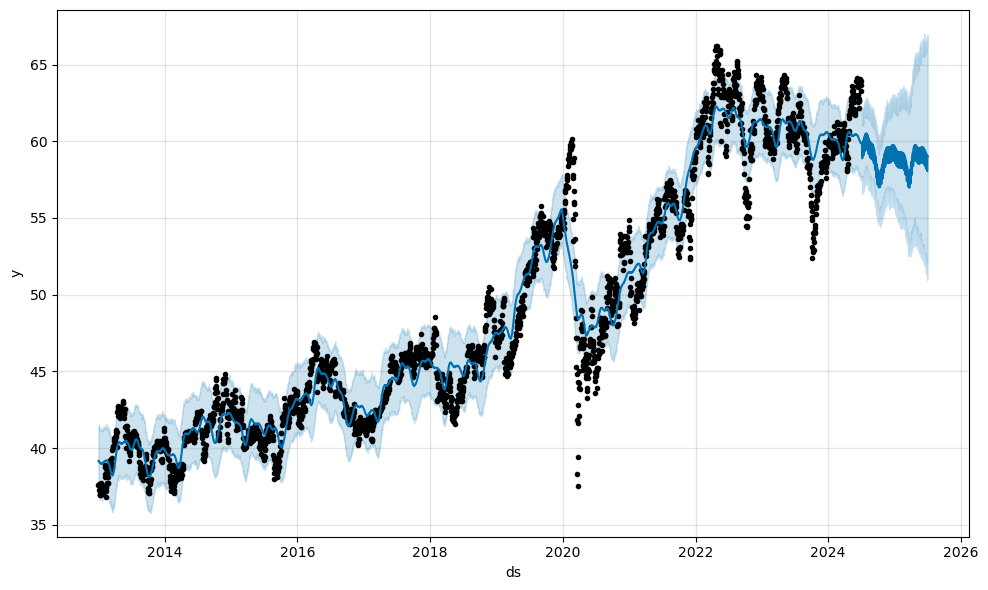

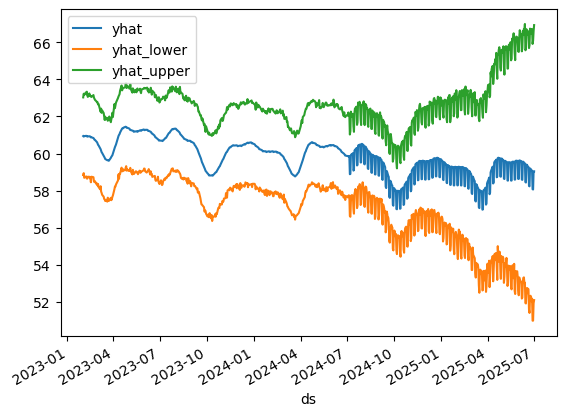

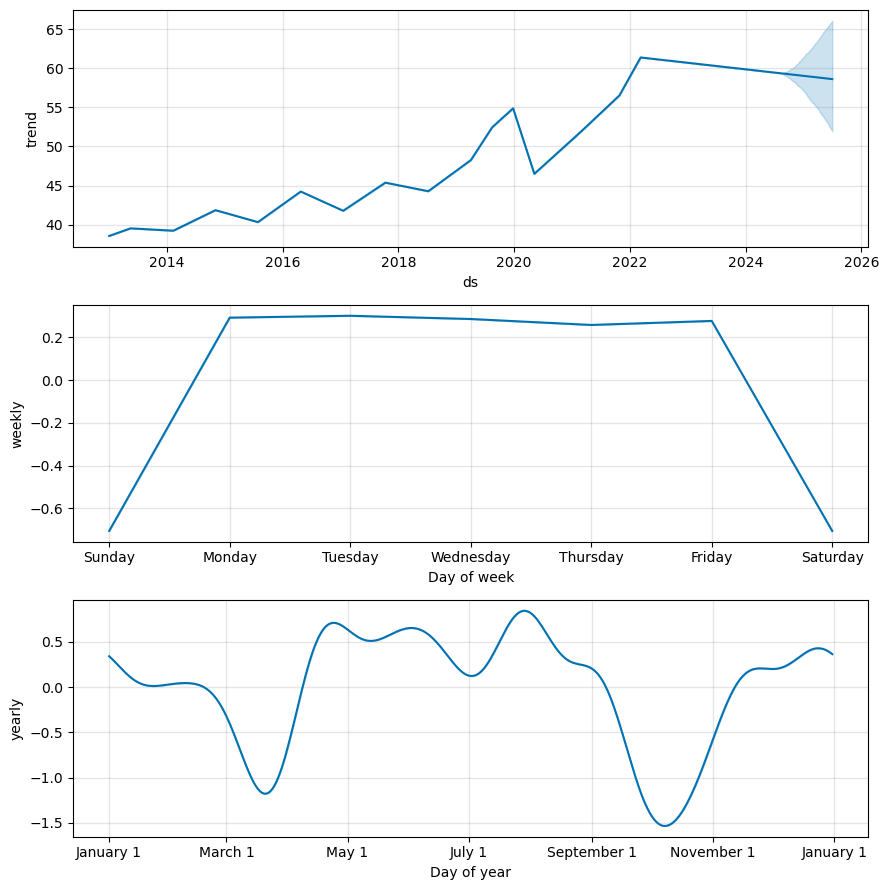

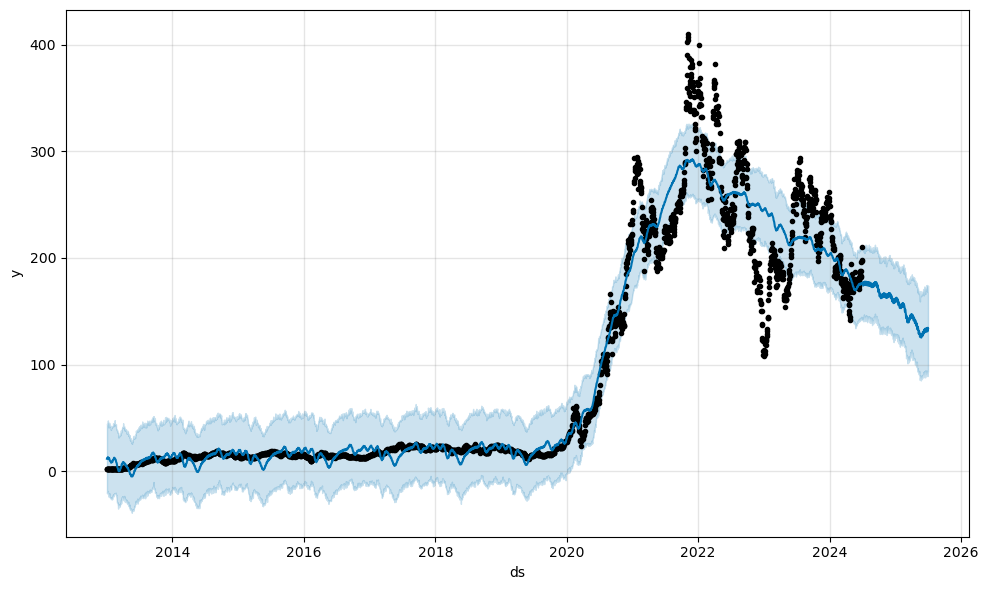

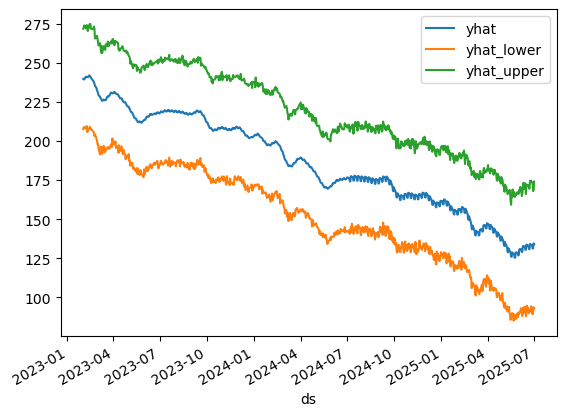

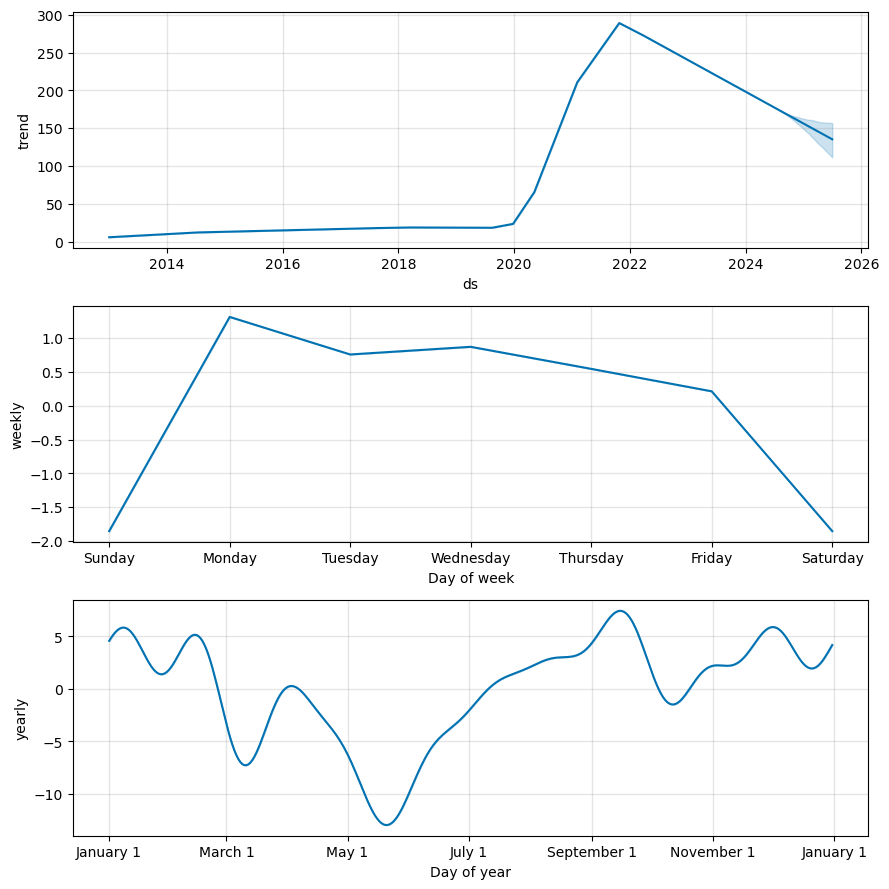

In [67]:
# Train and evaluate models for each ticker
for ticker in tickers:
    print(f'\nEvaluating models for {ticker}')
    train_and_evaluate(ticker, combined_data)